# 1. Data Pre-processing

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv('file.csv', encoding = "ISO-8859-1")

## Standardize data
df_cleaned = df.replace('Not Available', np.nan)

## Remove rows: Drop rows that contain less than 30 columns values 
df_cleaned.dropna(thresh = 30, inplace = True)
Count_Row=df_cleaned.shape[0]

## Remove columns: Drop columns that contain less than 70% of data 
df_cleaned.dropna(axis = 1, thresh = Count_Row * 0.7, inplace = True)
df_cleaned.dropna(subset=['Quality of patient care star rating'], inplace=True)
df_cleaned.shape # (7802, 39)

#count NAN values for all columns in the dataframe
df_cleaned.isnull().sum()

State                                                                                                                        0
CMS Certification Number (CCN)                                                                                               0
Provider Name                                                                                                                0
Address                                                                                                                      0
City                                                                                                                         0
Zip                                                                                                                          0
Type of Ownership                                                                                                            0
Offers Nursing Care Services                                                                                   

In [2]:
# cleaned Dataset 
df_cleaned

,State,CMS Certification Number (CCN),Provider Name,Address,City,Zip,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,...,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family"
1,AL,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,35020,Government - State/ County,Yes,Yes,Yes,...,4,4,90,4,88,3,84,5,92,76
2,AL,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,35216,Proprietary,Yes,Yes,Yes,...,5,5,91,5,89,4,89,4,90,82
3,AL,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,36330,Proprietary,Yes,Yes,Yes,...,5,5,93,5,92,5,91,4,93,90
4,AL,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,35031,Proprietary,Yes,Yes,Yes,...,4,4,88,5,87,3,85,4,84,81
5,AL,17016,SOUTHEAST ALABAMA HOMECARE,804 GLOVER AVENUE,ENTERPRISE,36330,Proprietary,Yes,Yes,Yes,...,5,4,91,5,88,5,91,4,89,86
7,AL,17018,GENTIVA HEALTH SERVICES,"3225 RAINBOW STREET, SUITE 256",RAINBOW CITY,35906,Proprietary,Yes,Yes,Yes,...,4,5,92,4,88,4,88,4,90,86
8,AL,17020,AMEDISYS HOME HEALTH CARE,"273 AZALEA ROAD, SUITE 204, BLDG 2",MOBILE,36609,Proprietary,Yes,Yes,Yes,...,3,2,84,3,83,3,83,3,81,79
9,AL,17024,SOUTHEAST ALABAMA HOMECARE,2841 MONTGOMERY HIGHWAY,DOTHAN,36301,Proprietary,Yes,Yes,Yes,...,4,4,90,5,89,4,88,3,86,82
10,AL,17025,SAAD HEALTHCARE,"1515 UNIVERSITY BLVD, SOUTH",MOBILE,36609,Proprietary,Yes,Yes,Yes,...,4,4,90,4,88,3,85,3,84,84
11,AL,17026,GENTIVA HEALTH SERVICES,"2200 RIVERCHASE PARKWAY, BUILDING 700",BIRMINGHAM,35244,Proprietary,Yes,Yes,Yes,...,4,4,90,4,87,3,85,4,87,85


## Missing Data Imputation: fill in column average values

In [5]:
## Impute with the average values of the columns
var_list = list()
convert_list = list()

qualityOfCare = 'Quality of patient care star rating'
var_list.append(qualityOfCare)

freqOfCheckFalling = "How often the home health team checked patients risk of falling"
var_list.append(freqOfCheckFalling)

freqOfCheckFlu = "How often the home health team determined whether patients received a flu shot for the currnet flu season"
var_list.append(freqOfCheckFlu)

freqOfCheckVaccine = "How often the home health team made sure that their patients have received a pneumococcal vaccine (pneumonia shot)"
var_list.append(freqOfCheckVaccine)

freqOfCheckOrders = "With diabetes, how often the home health team got doctors orders, gave foot care, and taught patients about foot care"
var_list.append(freqOfCheckOrders)

freqOfWalking = "How often patients got better at walking or moving around"
var_list.append(freqOfWalking)

freqOfBed = "How often patients got better at getting in and out of bed"
var_list.append(freqOfBed)

freqOfBathing = "How often patients got better at bathing"
var_list.append(freqOfBathing)

freqOfPain = "How often patients had less pain when moving around"
var_list.append(freqOfPain)

freqOfBreathing = "How often patients breathing improved"
var_list.append(freqOfBreathing)

freqOfDrugs = "How often patients got better at taking their drugs correctly by mouth"
var_list.append(freqOfDrugs)

freqOfHospitals = "How often home health patients had to be admitted to the hospital"
var_list.append(freqOfHospitals)

freqOfER = "How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted"
var_list.append(freqOfER)

# Convert column type from object to float then impute with the averages
starSummary = "HHCAHPS Survey Summary Star Rating"
convert_list.append(starSummary)

starProfessional = "Star Rating for health team gave care in a professional way"
percentProfessional = "Percent of patients who reported that their home health team gave care in a professional way"
convert_list.append(starProfessional)
convert_list.append(percentProfessional)

starCommunication = "Star Rating for health team communicated well with them"
percentCommunication = "Percent of patients who reported that their home health team communicated well with them"
convert_list.append(starCommunication)
convert_list.append(percentCommunication)

starDiscuss = "Star Rating team discussed medicines, pain, and home safety"
percentDiscuss = "Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them"
convert_list.append(starDiscuss)
convert_list.append(percentDiscuss)

starCare = "Star Rating for how patients rated overall care from agency"
convert_list.append(starCare)

percentRecommend = "Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family"
convert_list.append(percentRecommend)

percentRating = "Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)"
convert_list.append(percentRating)
                    
#df_cleaned.isnull().sum()


In [6]:
## Define functions and Loop over elements in a list in python

def fillna (str):
    df_cleaned[str].fillna(df_cleaned[str].mean(), inplace=True)
    return;

def convertype (str):
    df_cleaned[str] = df_cleaned[str].astype('float64')

# fill na    
for s in var_list:
    fillna (s)

# Convert types and fillna
for s in convert_list: 
    convertype(s)
    fillna(s)
    
df_cleaned.isnull().sum() # Check whether exist Null

State                                                                                                                     0
CMS Certification Number (CCN)                                                                                            0
Provider Name                                                                                                             0
Address                                                                                                                   0
City                                                                                                                      0
Zip                                                                                                                       0
Type of Ownership                                                                                                         0
Offers Nursing Care Services                                                                                              0
Offers P

#  2. Exploratory Data Analysis (Graphs)

## 2.1 Categorical variables 

### 2.1.1 Type Of Ownership Distribution


In [7]:
# Find unique values of ownership
unique_health_ownership= df_cleaned['Type of Ownership'].unique()
unique_health_ownership

# Dummy variable: 
# get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified.
dummy_data = pd.get_dummies(df_cleaned['Type of Ownership'])

In [8]:
unique_health_ownership

array(['Government - State/ County', 'Proprietary',
       'Non - Profit Religious', 'Non - Profit Private',
       'Non - Profit Other', 'Government - Local',
       'Government - Combination Government & Voluntary'], dtype=object)

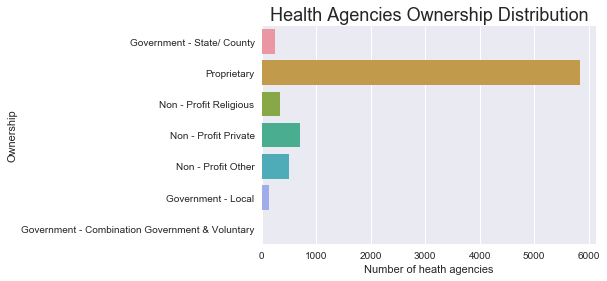

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Count the number of values within a category
a=dummy_data['Government - State/ County'].sum()
b=dummy_data['Proprietary'].sum()
c=dummy_data['Non - Profit Religious'].sum()
d=dummy_data['Non - Profit Private'].sum()
e=dummy_data['Non - Profit Other'].sum()
f=dummy_data['Government - Local'].sum()
g=dummy_data['Government - Combination Government & Voluntary'].sum()
list_name = [a,b,c,d,e,f,g]

# Plot the number of health agencies vs the ownership
ax = sns.barplot(y = unique_health_ownership, x = list_name, data = df_cleaned)
ax.set(xlabel = 'Number of heath agencies', ylabel = 'Ownership')
ax.set_title("Health Agencies Ownership Distribution", fontsize = 18)

## 2.2 Numeric Variables 

### 2.2.1 Check the mean, std, min, max of numeric data

In [10]:
# for var_list measures
df_cleaned[var_list].describe()

# for convert_list - patients survey measures
df_cleaned[convert_list].describe()

,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)
count,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000
mean,3.639290,3.884809,88.331846,3.923264,85.344968,2.905516,83.331453,3.307291,78.636137,84.074137
std,0.791997,0.870675,5.379243,0.851427,6.111871,0.931695,6.947481,0.858038,10.346144,8.586941
min,1.000000,1.000000,32.000000,1.000000,32.000000,1.000000,31.000000,1.000000,0.000000,1.000000
25%,3.000000,3.884809,86.000000,3.923264,83.000000,2.000000,80.000000,3.000000,74.000000,80.000000
50%,3.639290,4.000000,89.000000,3.923264,86.000000,2.905516,84.000000,3.307291,80.000000,85.000000
75%,4.000000,4.000000,92.000000,5.000000,89.000000,3.000000,88.000000,4.000000,85.000000,89.000000
max,5.000000,5.000000,100.000000,5.000000,100.000000,5.000000,100.000000,5.000000,100.000000,100.000000


### 2.2.2 Number of Health Agencies per State Distribution

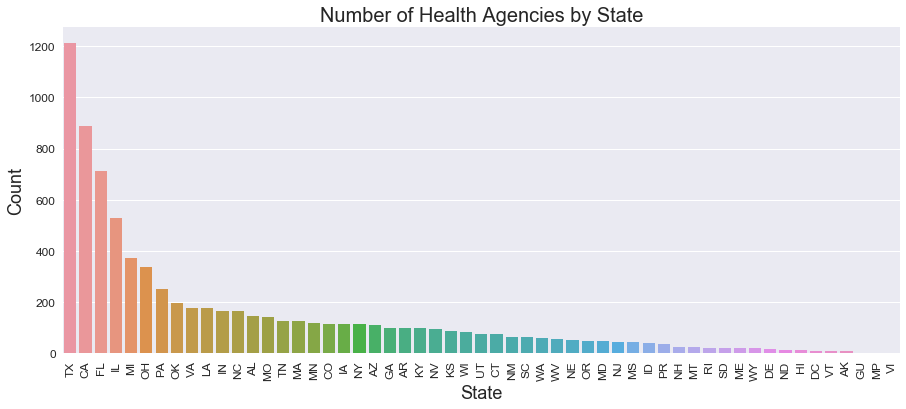

In [11]:
##### New implementation to sort the values
agency_count_state = df_cleaned.groupby('State')['State'].count()

## Separating index and values (sort the values)
index = agency_count_state.sort_values(ascending = False).index 
values = agency_count_state.sort_values(ascending = False).values

# Adjust figure dimensions to make the label text more fit 
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)

# Plot the number of health agencies vs the state
#ax = sns.barplot(y = index, x = values)
ax = sns.barplot(y = values, x = index)
plt.xlabel('State', fontsize=18)
plt.ylabel('Count', fontsize=18)
ax.set_title("Number of Health Agencies by State", fontsize = 20)
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)
## The states that have the most health agencies: TX, CA, FL, IL, MI, OH, PA, OK, VA, LA

### 2.2.3 Quality of patient care star rating Distribution 

In [12]:
# Sorting the values in Descending order as per the quality care star rating
sorted_rating = df_cleaned.sort_values([qualityOfCare], ascending = False)
#sorted_rating[qualityOfCare].head()
#sorted_rating[['Provider Name', qualityOfCare]].head()

Unique_sorted_rating = sorted_rating[qualityOfCare].unique()

In [13]:
## Finding all the rows with ratings and separating them 
# and keeping a count of those rows which belongs to that particular rating category
rating_with_5 = sorted_rating.loc[sorted_rating[qualityOfCare] == 5]
Rating_5 = rating_with_5['CMS Certification Number (CCN)'].count()

rating_with_45 = sorted_rating.loc[sorted_rating[qualityOfCare] == 4.5]
Rating_45 = rating_with_45['CMS Certification Number (CCN)'].count()

rating_with_4 = sorted_rating.loc[sorted_rating[qualityOfCare] == 4]
Rating_4 = rating_with_4['CMS Certification Number (CCN)'].count()

rating_with_35 = sorted_rating.loc[sorted_rating[qualityOfCare] == 3.5]
Rating_35 = rating_with_35['CMS Certification Number (CCN)'].count()

rating_with_3 = sorted_rating.loc[sorted_rating[qualityOfCare] == 3]
Rating_3 = rating_with_3['CMS Certification Number (CCN)'].count()

rating_with_25 = sorted_rating.loc[sorted_rating[qualityOfCare] == 2.5]
Rating_25 = rating_with_25['CMS Certification Number (CCN)'].count()

rating_with_2 = sorted_rating.loc[sorted_rating[qualityOfCare] == 2]
Rating_2 = rating_with_2['CMS Certification Number (CCN)'].count()

rating_with_15 = sorted_rating.loc[sorted_rating[qualityOfCare] == 1.5]
Rating_15 = rating_with_15['CMS Certification Number (CCN)'].count()

rating_with_1 = sorted_rating.loc[sorted_rating[qualityOfCare] == 1]
Rating_1 = rating_with_1['CMS Certification Number (CCN)'].count()

list_t = [Rating_5, Rating_45, Rating_4, Rating_35, Rating_3, Rating_25, Rating_2, Rating_15, Rating_1]
list_t

[301, 807, 1307, 1703, 1626, 1200, 671, 175, 12]

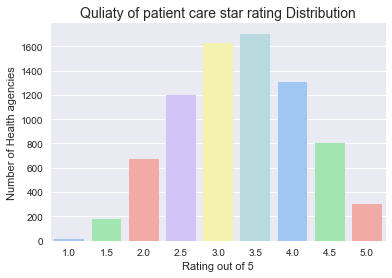

In [14]:
ax = sns.barplot(x = Unique_sorted_rating, y = list_t, data = df_cleaned, palette = 'pastel')
ax.set(xlabel = 'Rating out of 5', ylabel = "Number of Health agencies")
ax.set_title("Quliaty of patient care star rating Distribution", fontsize = 14)

In [15]:
## Average of quality of patient care star rating
#df_cleaned[qualityOfCare].mean()
df_cleaned[qualityOfCare].describe()

count    7802.000000
mean        3.309344
std         0.833432
min         1.000000
25%         2.500000
50%         3.500000
75%         4.000000
max         5.000000
Name: Quality of patient care star rating, dtype: float64

### 2.2.4 The average health agencies rating by state

In [16]:
df_cleaned[qualityOfCare].mean()
Statewise_average_rating = df_cleaned.groupby('State')[qualityOfCare].mean()

## Separating index and values
index = Statewise_average_rating.sort_values(ascending = False).index 
values = Statewise_average_rating.sort_values(ascending = False).values

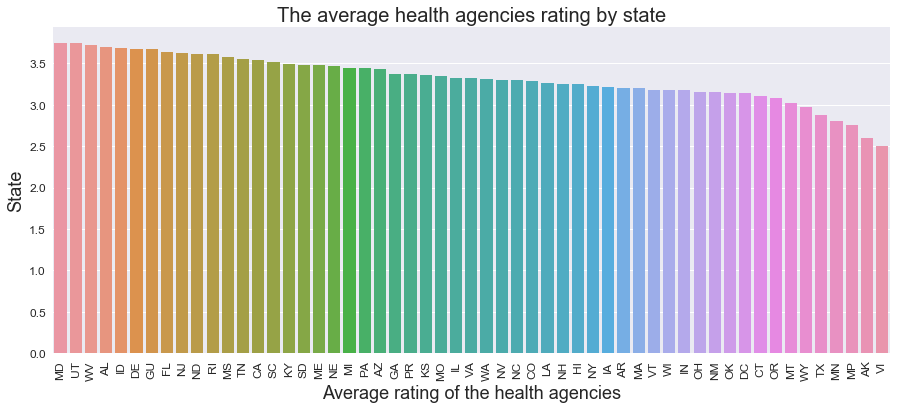

In [17]:
a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)

#ax = sns.barplot(y = index, x = values)
ax = sns.barplot(y = values, x = index)
#ax.set(xlabel = 'Average rating of the health agencies', ylabel = 'State')
plt.xlabel('Average rating of the health agencies', fontsize=18)
plt.ylabel('State', fontsize=18)
ax.set_title("The average health agencies rating by state", fontsize = 20)
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)

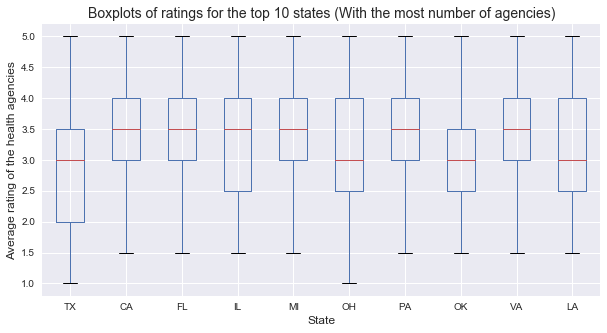

In [18]:
#df_cleaned.loc[df['B'] == 3, 'A']
col_list = ["State",qualityOfCare]
df_state = df_cleaned[col_list]

## Top 10 states that have the most number of health agencies
state_list = ['TX', 'CA', 'FL', 'IL', 'MI', 'OH', 'PA', 'OK', 'VA', 'LA']
for s in state_list: 
    if s == state_list[0]:
        df_merge = df_state.loc[df_state['State'] == s, qualityOfCare]
    else:
        temp = df_state.loc[df_state['State'] == s, qualityOfCare]
        df_merge = pd.concat([df_merge,temp], axis = 1)

df_merge.columns = state_list
## Using seaborn.boxplot
#a4_dims = (10, 5)
#fig, ax = plt.subplots(figsize=a4_dims)
#ax = sns.boxplot(data=df_merge)

df_merge.plot.box(figsize=(10, 5))
plt.title("Boxplots of ratings for the top 10 states (With the most number of agencies)", fontsize = 14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average rating of the health agencies', fontsize=12)
plt.tick_params(labelsize=10)

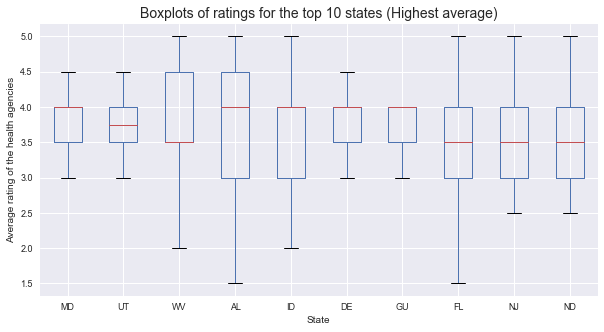

In [19]:
#df_cleaned.loc[df['B'] == 3, 'A']
col_list = ["State",qualityOfCare]
df_state = df_cleaned[col_list]

## Top 10 states that have the most number of health agencies
state_list = ['MD', 'UT', 'WV', 'AL', 'ID', 'DE', 'GU', 'FL', 'NJ', 'ND']
for s in state_list: 
    if s == state_list[0]:
        df_merge = df_state.loc[df_state['State'] == s, qualityOfCare]
    else:
        temp = df_state.loc[df_state['State'] == s, qualityOfCare]
        df_merge = pd.concat([df_merge,temp], axis = 1)

df_merge.columns = state_list
## Using seaborn.boxplot
#a4_dims = (10, 5)
#fig, ax = plt.subplots(figsize=a4_dims)
#ax = sns.boxplot(data=df_merge)

df_merge.plot.box(figsize=(10, 5))
plt.title("Boxplots of ratings for the top 10 states (Highest average)", fontsize = 14)
plt.xlabel('State', fontsize=10)
plt.ylabel('Average rating of the health agencies', fontsize=10)
plt.tick_params(labelsize=9)

### 2.2.6 The average star rating for each city within a state


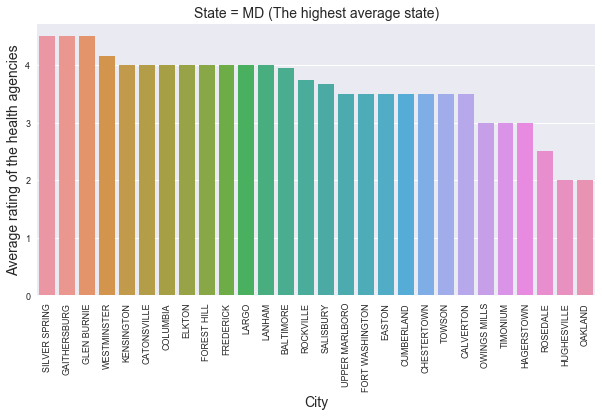

In [20]:
df_city = df_cleaned.loc[df['State'] == 'MD', ['City', qualityOfCare]]
city_average_rating = df_city.groupby('City')[qualityOfCare].mean()

## Separating index and values
index = city_average_rating.sort_values(ascending = False).index 
values = city_average_rating.sort_values(ascending = False).values

a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(y = values, x = index)
#ax = sns.factorplot(y = values, x = index)
ax.set_title("State = MD (The highest average state)", fontsize = 14)
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average rating of the health agencies', fontsize=14)
plt.tick_params(labelsize=9)

## Delete useless columns

In [21]:
# Delete useless columns
df_cleaned = df_cleaned.drop('Provider Name', 1)
df_cleaned = df_cleaned.drop('Address', 1)
df_cleaned = df_cleaned.drop('City', 1)
df_cleaned = df_cleaned.drop('Zip', 1)
df_cleaned = df_cleaned.drop('CMS Certification Number (CCN)', 1)
df_cleaned = df_cleaned.drop('State', 1)
df_cleaned = df_cleaned.drop('Type of Ownership', 1)
df_cleaned.shape  #7802 * 32

(7802, 32)

# 3. Supervised Learning

## Pre-process data for DT

In [22]:
# Replace header by using ['a','b','c'...] in order to call each feature
# columnlist1 = list(map(chr, range(97, 123)))
# columnlist2 = list(map(chr, range(65,73)))

# columnlist = columnlist1 + columnlist2


feature_name_1 = ["Nursing_Care", "Physical_therapy", "Occupational_Therapy","Speech_pathology",\
                "Medical_Social","HomeHealth_Aide","Star_rating","Timely_manner","Drug_taught",\
                "Falling_check","Depression_check", "Flu_shot","pneumococcal_vaccine",\
                "Foot_care","Walking","InOut_bed","Bathing",\
                "Lesspain_Walking","Breathing","Drug_bymouth","Admitted_hospital",\
                "Urgentcare_ER","Survey_Sumrating","Professional_rating","Professional_percent",\
                "Communicate_rating","Communicate_percent","Medicine_rating","Medicine_percent",\
                "Overall_rating","Rating9or10_percent","Recom_percent"] 
print(len(feature_name_1))
list(zip(df_cleaned.columns,feature_name_1))
## Header Replacement after:before


32


[('Offers Nursing Care Services', 'Nursing_Care'),
 ('Offers Physical Therapy Services', 'Physical_therapy'),
 ('Offers Occupational Therapy Services', 'Occupational_Therapy'),
 ('Offers Speech Pathology Services', 'Speech_pathology'),
 ('Offers Medical Social Services', 'Medical_Social'),
 ('Offers Home Health Aide Services', 'HomeHealth_Aide'),
 ('Quality of patient care star rating', 'Star_rating'),
 ('How often the home health team began their patients\x92 care in a timely manner',
  'Timely_manner'),
 ('How often the home health team taught patients (or their family caregivers) about their drugs',
  'Drug_taught'),
 ('How often the home health team checked patients\x92 risk of falling',
  'Falling_check'),
 ('How often the home health team checked patients for depression',
  'Depression_check'),
 ('How often the home health team determined whether patients received a flu shot for the currnet flu season',
  'Flu_shot'),
 ('How often the home health team made sure that their patient

In [23]:
## Replace Headers
df_cleaned.columns = feature_name_1
print(df_cleaned.shape)  # 7802 rows × 34 columns
print(df_cleaned)

(7802, 32)
      Nursing_Care Physical_therapy Occupational_Therapy Speech_pathology  \
1              Yes              Yes                  Yes              Yes   
2              Yes              Yes                  Yes              Yes   
3              Yes              Yes                  Yes               No   
4              Yes              Yes                  Yes              Yes   
5              Yes              Yes                  Yes              Yes   
7              Yes              Yes                  Yes              Yes   
8              Yes              Yes                  Yes              Yes   
9              Yes              Yes                  Yes              Yes   
10             Yes              Yes                  Yes              Yes   
11             Yes              Yes                  Yes              Yes   
12             Yes              Yes                  Yes              Yes   
13             Yes              Yes                  Yes         

In [24]:
# LabelBinarizer & One-hot Encoding
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
enc = preprocessing.OneHotEncoder()


# column Nursing_Care 
Nursing_Care = lb.fit_transform(df_cleaned.Nursing_Care)
enc.fit(Nursing_Care)
transfomed_Nursing_Care = enc.transform(Nursing_Care).toarray()
print("The transformed column Nursing_Care is:",transfomed_Nursing_Care)
print (transfomed_Nursing_Care.shape)

# column Physical_therapy
Physical_therapy = lb.fit_transform(df_cleaned.Physical_therapy)
enc.fit(Physical_therapy)
transfomed_Physical_therapy = enc.transform(Physical_therapy).toarray()
print("The transformed column Physical_therapy is:",transfomed_Physical_therapy)
print (transfomed_Physical_therapy.shape)

# column Occupational_Therapy
Occupational_Therapy = lb.fit_transform(df_cleaned.Occupational_Therapy)
enc.fit(Occupational_Therapy)
transfomed_Occupational_Therapy = enc.transform(Occupational_Therapy).toarray()
print("The transformed column Occupational_Therapy is:",transfomed_Occupational_Therapy)
print (transfomed_Occupational_Therapy.shape)

#column Speech_pathology
Speech_pathology = lb.fit_transform(df_cleaned.Speech_pathology)
enc.fit(Speech_pathology)
transfomed_Speech_pathology = enc.transform(Speech_pathology).toarray()
print("The transformed column Speech_pathology is:",transfomed_Speech_pathology)
print (transfomed_Speech_pathology.shape)

#column Medical_Social
Medical_Social = lb.fit_transform(df_cleaned.Medical_Social)
enc.fit(Medical_Social)
transfomed_Medical_Social = enc.transform(Medical_Social).toarray()
print("The transformed column Medical_Social is:",transfomed_Medical_Social)
print (transfomed_Medical_Social.shape)

#column HomeHealth_Aide
HomeHealth_Aide = lb.fit_transform(df_cleaned.HomeHealth_Aide)
enc.fit(HomeHealth_Aide)
transfomed_HomeHealth_Aide = enc.transform(HomeHealth_Aide).toarray()
print("The transformed column HomeHealth_Aide is:",transfomed_HomeHealth_Aide)
print (transfomed_HomeHealth_Aide.shape)

## Convert Class variable 
df_cleaned.Star_rating
bins = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1]
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
currentcv = pd.cut(df_cleaned['Star_rating'], bins, labels=group_names)
currentcv = currentcv.astype('object')
# print(currentcv)
# print(categories)
# dumCV = pd.get_dummies(categories)
# cv = dumCV.as_matrix(columns=None)
cv =  currentcv.reshape((len(currentcv), 1))
print(type(cv))
print(cv)


The transformed column Nursing_Care is: [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
(7802, 1)
The transformed column Physical_therapy is: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
(7802, 2)
The transformed column Occupational_Therapy is: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
(7802, 2)
The transformed column Speech_pathology is: [[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]]
(7802, 2)
The transformed column Medical_Social is: [[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
(7802, 2)
The transformed column HomeHealth_Aide is: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
(7802, 2)
<class 'numpy.ndarray'>
[['Good']
 ['Good']
 ['Good']
 ..., 
 ['Good']
 ['Good']
 ['Good']]


/Users/kechen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [29]:
# prepare datasets to be fed in the regression model
prev = np.concatenate((transfomed_Nursing_Care,transfomed_Physical_therapy,\
                       transfomed_Occupational_Therapy,transfomed_Speech_pathology,\
                       transfomed_Medical_Social, transfomed_HomeHealth_Aide),axis=1)

for ele in range(7,32):
    if ele == 7:
        tem = df_cleaned.iloc[:,ele].values.reshape((len(df_cleaned.ix[:,ele]), 1))
        data = np.concatenate((prev,tem),axis=1)
    else:
        tem = df_cleaned.iloc[:,ele].values.reshape((len(df_cleaned.ix[:,ele]), 1))
        data = np.concatenate((data,tem),axis=1)
print("data.shape:",data.shape) #(7802, 36）


data.shape: (7802, 36)


# Supervised Part --- Decision Tree

##  Find Feature Importance Rank from Root node to leaves

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

# Create linear regression object
DT = DecisionTreeClassifier(criterion="entropy" )
# Train the model using the training sets
DT.fit(data, cv)
# the model 
feature_name = ["Nursing_Care_yes", "Physical_therapy_no", "Physical_therapy_yes", "Occupational_Therapy_no",
                "Occupational_Therapy_yes","Speech_pathology_no", "Speech_pathology_yes","Medical_Social_no",
                "Medical_Social_yes","HomeHealth_Aide_no","HomeHealth_Aide_yes", "Timely_manner",
                "Drug_taught","Falling_check","Depression_check", "Flu_shot",
                "pneumococcal_vaccine","Foot_care","Walking","InOut_bed",
                "Bathing","Lesspain_Walking","Breathing","Drug_bymouth",
                "Admitted_hospital","Urgentcare_ER","Survey_Sumrating","Professional_rating",
                "Professional_percent","Communicate_rating","Communicate_percent","Medicine_rating",
                "Medicine_percent","Overall_rating","Rating9or10_percent","Recom_percent"] 
print("Feature importance: ", DT.feature_importances_)

Feature importance:  [ 0.          0.          0.          0.          0.          0.00098291
  0.00090086  0.          0.          0.          0.00050135  0.07820806
  0.0642402   0.00478789  0.00923216  0.0874081   0.00578436  0.00803309
  0.05166507  0.07505608  0.323977    0.13719045  0.05276704  0.00980077
  0.04877416  0.00784852  0.          0.00094863  0.00319817  0.0030769
  0.00505924  0.00094141  0.00476414  0.00231018  0.00494818  0.00759508]


/Users/kechen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Decision Tree Full Model

### --- hyper-parameters

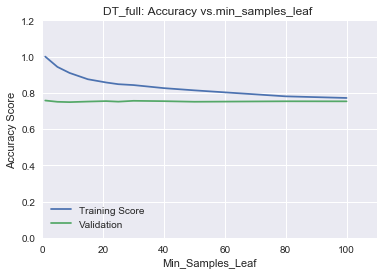

In [27]:
# Decision Tree Full Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score
import matplotlib.pyplot as plt

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(data, cv)
    tempDT1 = DT.score(data,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, data, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.title("DT_full: Accuracy vs.min_samples_leaf ")
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree Modelling (All Features)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

# Create linear regression object
DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf =90 )
# Train the model using the training sets
DT.fit(data, cv)
# the model 
feature_name = ["Nursing_Care_yes", "Physical_therapy_no", "Physical_therapy_yes", "Occupational_Therapy_no",
                "Occupational_Therapy_yes","Speech_pathology_no", "Speech_pathology_yes","Medical_Social_no",
                "Medical_Social_yes","HomeHealth_Aide_no","HomeHealth_Aide_yes", "Timely_manner",
                "Drug_taught","Falling_check","Depression_check", "Flu_shot",
                "pneumococcal_vaccine","Foot_care","Walking","InOut_bed",
                "Bathing","Lesspain_Walking","Breathing","Drug_bymouth",
                "Admitted_hospital","Urgentcare_ER","Survey_Sumrating","Professional_rating",
                "Professional_percent","Communicate_rating","Communicate_percent","Medicine_rating",
                "Medicine_percent","Overall_rating","Rating9or10_percent","Recom_percent"] 

# with open("predict_star_rating.dot", 'w') as f:
#     dot_data = tree.export_graphviz(DT, out_file=f ,feature_names=feature_name, class_names = group_names, filled=True)
print("Feature importance: ", DT.feature_importances_)
# Validation ---> full features

model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, data, CV, cv=kf)
print("Full model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model: \n", DT.score(data,cv))
print("Full model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))


Feature importance:  [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.08221419  0.03125152
  0.          0.          0.09932744  0.          0.          0.03705954
  0.08002981  0.47227525  0.18028254  0.01392587  0.          0.00363384
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
Full model MSE of every fold in 5 fold cross validation:  [ 0.75464446  0.75080077  0.75833333  0.75897436  0.75128205]
Accuracy score for the model: 
 0.778646500897
Full model Mean of the 5 fold cross-validation: 0.75


## Build pruning model 1 （2 features）

### --- hyper-parameters

Importance_1 size:  (7802, 2)


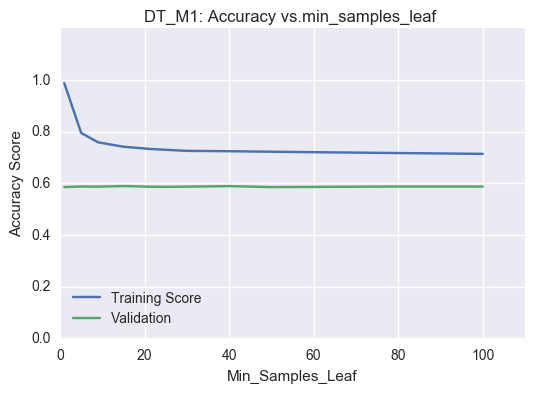

In [27]:
# Input
Importance_1 =  data[:,20:22]
print("Importance_1 size: ", Importance_1.shape )

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_1, cv)
    tempDT1 = DT.score(Importance_1,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_1, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.title("DT_M1: Accuracy vs.min_samples_leaf ")
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (2 features) modelling and evaluation 

In [28]:
# Desicion model 1  "Bathing" + "Lesspain_Walking"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

Importance_1 =  data[:,20:22]
print("Importance_1 size: ", Importance_1.shape )  

# Create linear regression object
DT_1 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_1.fit(Importance_1, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_1 = ["Bathing","Lesspain_Walking"]
# with open("predict_star_rating_1.dot", 'w') as f:
#     dot_data = tree.export_graphviz(DT_1, out_file=f ,feature_names=feature_name_1, class_names = ['Low', 'Okay','Average', 'Good', 'Great'], filled=True)

print("Feature importance model 1: ", DT_1.feature_importances_)


# Validation ---> 2 features

model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_1, CV, cv=kf)
print("Full model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 1: \n", DT_1.score(Importance_1,cv))
print("Full model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))


Importance_1 size:  (7802, 2)
Feature importance model 1:  [ 0.69603863  0.30396137]
Full model MSE of every fold in 5 fold cross validation:  [ 0.57335042  0.59256887  0.57115385  0.6         0.6025641 ]
Accuracy score for the model 1: 
 0.714944885927
Full model Mean of the 5 fold cross-validation: 0.59


## Build pruning model 2 (5 features)

### --- hyper-parameters

Importance_2 size:  (7802, 5)


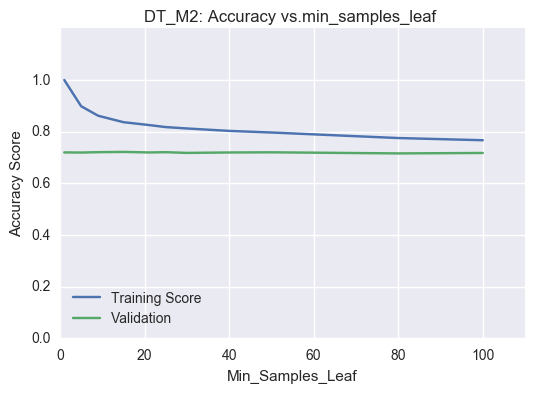

In [29]:
# Input
colm_2 = [20,21,11,15,12]  ## 5 features
Importance_2 =  data[:,colm_2]
print("Importance_2 size: ", Importance_2.shape )

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_2, cv)
    tempDT1 = DT.score(Importance_2,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_2, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M2: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (5 features) modelling and evaluation 

In [30]:
# desicion Tree Model 2
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

#colm = [20,21,11,15,12,19,24,22,18,14,23,32,16]
colm_2 = [20,21,11,15,12]  ## 5 features
Importance_2 =  data[:,colm_2]
print("Importance_2 size: ", Importance_2.shape )  

# Create linear regression object
DT_2 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_2.fit(Importance_2, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_2 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught"]
with open("predict_star_rating_2.dot", 'w') as f:
    f = tree.export_graphviz(DT_2, out_file=f ,feature_names=feature_name_2, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 2: ", DT_2.feature_importances_)


# Validation ---> 5 features

model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_2, CV, cv=kf)
print("Full model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 2: \n", DT_2.score(Importance_2,cv))
print("Full model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))



Importance_2 size:  (7802, 5)
Feature importance model 2:  [ 0.55693752  0.20855753  0.09163786  0.10644473  0.03642235]
Full model MSE of every fold in 5 fold cross validation:  [ 0.72325432  0.69506726  0.73717949  0.72884615  0.71346154]
Accuracy score for the model 2: 
 0.773519610356
Full model Mean of the 5 fold cross-validation: 0.72


## Build pruning model 3 (7 features)

### --- hyper-parameters

Importance_3 size:  (7802, 7)


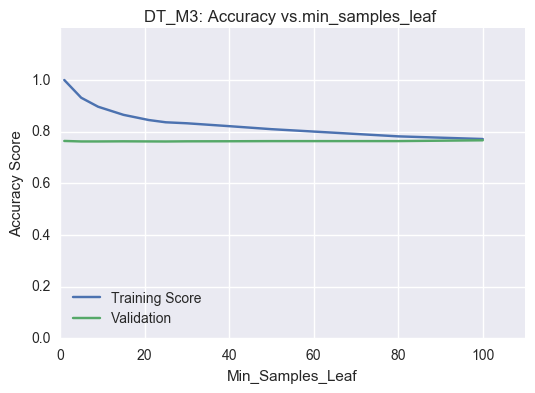

In [31]:
## Input
colm_3 = [20,21,11,15,12,19,24] ## Seven Features
Importance_3 =  data[:,colm_3]
print("Importance_3 size: ", Importance_3.shape )

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_3, cv)
    tempDT1 = DT.score(Importance_3,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_3, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M3: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (7 features) modelling and evaluation 

In [32]:
## Decision Tree Model 3
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

#colm = [20,21,11,15,12,19,24,22,18,14,23,32,16]
colm_3 = [20,21,11,15,12,19,24] ## Seven Features
Importance_3 =  data[:,colm_3]
print("Importance_3 size: ", Importance_3.shape )  

# Create linear regression object
DT_3 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_3.fit(Importance_3, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_3 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught",\
                  "InOut_bed","Admitted_hospital"]
with open("predict_star_rating_3.dot", 'w') as f:
    f = tree.export_graphviz(DT_3, out_file=f ,feature_names=feature_name_3, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 3: ", DT_3.feature_importances_)



# Validation ---> 7 features

model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_3, CV, cv=kf)
print("Full model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 3: \n", DT_3.score(Importance_3,cv))
print("Full model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))




Importance_3 size:  (7802, 7)
Feature importance model 3:  [ 0.49363587  0.19192023  0.08537151  0.1025534   0.03235602  0.08917538
  0.0049876 ]
Full model MSE of every fold in 5 fold cross validation:  [ 0.76809737  0.76809737  0.75384615  0.77307692  0.75961538]
Accuracy score for the model 3: 
 0.779415534478
Full model Mean of the 5 fold cross-validation: 0.76


## Decision Tree Model 4 (9 features)

### --- hyper-parameters

Importance_4 size:  (7802, 9)


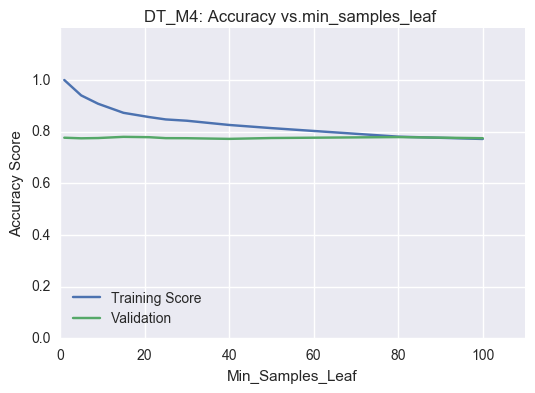

In [33]:
# Input
colm_4 = [20,21,11,15,12,19,24,22,18]  ## 9 features
Importance_4 =  data[:,colm_4]
print("Importance_4 size: ", Importance_4.shape )

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_4, cv)
    tempDT1 = DT.score(Importance_4,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_4, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M4: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (9 features) modelling and evaluation 

In [34]:
## Decision Tree Model 4
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

#colm = [20,21,11,15,12,19,24,22,18,14,23,32,16]
colm_4 = [20,21,11,15,12,19,24,22,18]  ## 9 features
Importance_4 =  data[:,colm_4]
print("Importance_4 size: ", Importance_4.shape )  

# Create linear regression object
DT_4 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_4.fit(Importance_4, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_4 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught",\
                  "InOut_bed","Admitted_hospital","Breathing", "Walking"]
with open("predict_star_rating_4.dot", 'w') as f:
    f = tree.export_graphviz(DT_4, out_file=f ,feature_names=feature_name_4, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 4: ", DT_4.feature_importances_)



# data = Importance_4 ---> 9 features
model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_4, CV, cv=kf)
print("Importance_4 model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 4: \n", DT_4.score(Importance_4,cv))
print("Importance_4 model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))



Importance_4 size:  (7802, 9)
Feature importance model 4:  [ 0.47227525  0.18028254  0.08221419  0.09932744  0.03125152  0.08002981
  0.00363384  0.01392587  0.03705954]
Importance_4 model MSE of every fold in 5 fold cross validation:  [ 0.76873799  0.77578475  0.77051282  0.80064103  0.76282051]
Accuracy score for the model 4: 
 0.778646500897
Importance_4 model Mean of the 5 fold cross-validation: 0.78


## Decision Tree Model 5 (10 features)

### --- hyper-parameters

Importance_5 size:  (7802, 10)


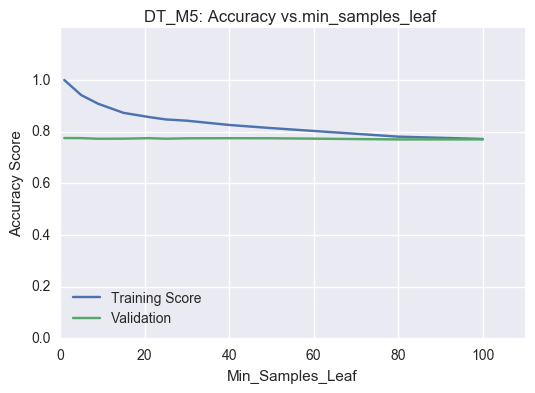

In [35]:
# Input
colm_5 = [20,21,11,15,12,19,24,22,18,14]  # 10 features
Importance_5 =  data[:,colm_5]
print("Importance_5 size: ", Importance_5.shape ) 

DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_5, cv)
    tempDT1 = DT.score(Importance_5,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_5, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M5: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (10 features) modelling and evaluation 

In [36]:
## Decision Tree Model 5
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

#colm = [20,21,11,15,12,19,24,22,18,14,23,32,16]
colm_5 = [20,21,11,15,12,19,24,22,18,14]  # 10 features
Importance_5 =  data[:,colm_5]
print("Importance_5 size: ", Importance_5.shape )  

# Create linear regression object
DT_5 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_5.fit(Importance_5, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_5 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught",\
                  "InOut_bed","Admitted_hospital","Breathing", "Walking"\
                 "Depression_check"]
# with open("predict_star_rating_5.dot", 'w') as f:
#     f = tree.export_graphviz(DT_5, out_file=f ,feature_names=feature_name_5, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 5: ", DT_5.feature_importances_)


# data = Importance_5 ---> 10 features
model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_5, CV, cv=kf)
print("Importance_5 model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 5: \n", DT_5.score(Importance_5,cv))
print("Importance_5 model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))



Importance_5 size:  (7802, 10)
Feature importance model 5:  [ 0.47227525  0.18028254  0.08221419  0.09932744  0.03125152  0.08002981
  0.00363384  0.01392587  0.03705954  0.        ]
Importance_5 model MSE of every fold in 5 fold cross validation:  [ 0.77130045  0.7693786   0.76923077  0.79230769  0.76153846]
Accuracy score for the model 5: 
 0.778646500897
Importance_5 model Mean of the 5 fold cross-validation: 0.77


## Decision Tree Model 6 (11 features)

### --- hyper-parameters

Importance_6 size:  (7802, 11)


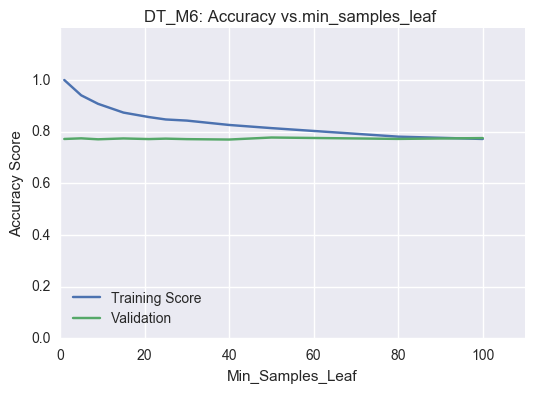

In [37]:
# Input
colm_6 = [20,21,11,15,12,19,24,22,18,14,23]  # 11 features
Importance_6 =  data[:,colm_6]
print("Importance_6 size: ", Importance_6.shape )  


DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,100]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_6, cv)
    tempDT1 = DT.score(Importance_6,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_6, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M6: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (11 features) modelling and evaluation 

In [38]:
## Decision Tree Model 6
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

#colm = [20,21,11,15,12,19,24,22,18,14,23,32,16]
colm_6 = [20,21,11,15,12,19,24,22,18,14,23]  # 11 features
Importance_6 =  data[:,colm_6]
print("Importance_6 size: ", Importance_6.shape )  

# Create linear regression object
DT_6 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_6.fit(Importance_6, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_6 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught",\
                  "InOut_bed","Admitted_hospital","Breathing", "Walking"\
                 "Depression_check","Drug_bymouth"]
# with open("predict_star_rating_6.dot", 'w') as f:
#     f = tree.export_graphviz(DT_6, out_file=f ,feature_names=feature_name_6, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 6: ", DT_6.feature_importances_)


# data = Importance_6 ---> 11 features
model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_6, CV, cv=kf)
print("Importance_6 model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 6: \n", DT_6.score(Importance_6,cv))
print("Importance_6 model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))



Importance_6 size:  (7802, 11)
Feature importance model 6:  [ 0.47227525  0.18028254  0.08221419  0.09932744  0.03125152  0.08002981
  0.00363384  0.01392587  0.03705954  0.          0.        ]
Importance_6 model MSE of every fold in 5 fold cross validation:  [ 0.77258168  0.75464446  0.76794872  0.78653846  0.76025641]
Accuracy score for the model 6: 
 0.778646500897
Importance_6 model Mean of the 5 fold cross-validation: 0.77


## Decision Tree Model 7 (12 features)

### --- hyper-parameters

Importance_7 size:  (7802, 12)


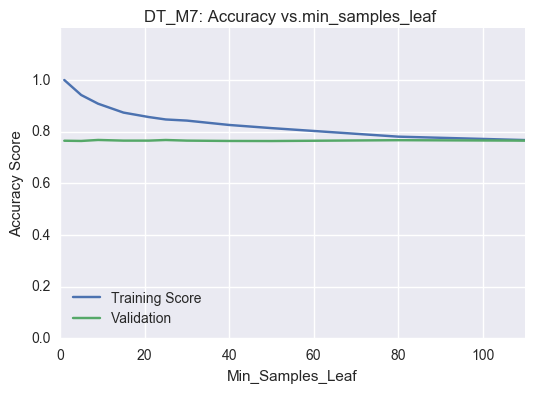

In [39]:
## Input
colm = [20,21,11,15,12,19,24,22,18,14,23,32] ## 13 features
Importance_7 =  data[:,colm]
print("Importance_7 size: ", Importance_7.shape )  


DTscore = []
DTvalidation = []
ParaDT = [1,5,9,15,21,25,30,40,50,80,110]
kf = KFold(len(cv), n_folds=5)
for i in ParaDT:
    # Create linear regression object
    DT = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i)
    # Train the model using the training sets
    DT.fit(Importance_7, cv)
    tempDT1 = DT.score(Importance_7,cv)
    DTscore.append(tempDT1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Importance_7, cv, cv=kf)
    tempDT2= abs(scores.mean())
    DTvalidation.append(tempDT2)
    
plt.plot(ParaDT,DTscore)
plt.plot(ParaDT,DTvalidation)
plt.axis([0, 110, 0, 1.2])
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Accuracy Score" )
plt.title("DT_M7: Accuracy vs.min_samples_leaf ")
plt.legend(['Training Score', 'Validation'], loc='lower left')
plt.show()

### Decision Tree (12 features) modelling and evaluation 

In [40]:
## Decision Tree Model 7
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score

colm = [20,21,11,15,12,19,24,22,18,14,23,32] ## 12 features
Importance_7 =  data[:,colm]
print("Importance_7 size: ", Importance_7.shape )  

# Create linear regression object
DT_7 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 90)
# Train the model using the training sets
DT_7.fit(Importance_7, cv)
group_names = ['Low', 'Okay','Average', 'Good', 'Great']
feature_name_7 = ["Bathing","Lesspain_Walking","Timely_manner","Flu_shot","Drug_taught",\
                  "InOut_bed","Admitted_hospital","Breathing", "Walking"\
                 "Depression_check","Drug_bymouth","Medicine_percent","pneumococcal_vaccine"]
# with open("predict_star_rating_7.dot", 'w') as f:
#     f = tree.export_graphviz(DT_7, out_file=f ,feature_names=feature_name_7, class_names = ["Low","Okay","Average","Good","Great"], filled=True)
print("Feature importance model 7: ", DT_7.feature_importances_)


# data = Importance_7 ---> 12 features
model = DecisionTreeClassifier()
kf = KFold(len(cv), n_folds=5)
CV = cv
scores = cross_val_score(model, Importance_7, CV, cv=kf)
print("Importance_7 model MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Accuracy score for the model 7: \n", DT_7.score(Importance_7,cv))
print("Importance_7 model Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))


Importance_7 size:  (7802, 12)
Feature importance model 7:  [ 0.47227525  0.18028254  0.08221419  0.09932744  0.03125152  0.08002981
  0.00363384  0.01392587  0.03705954  0.          0.          0.        ]
Importance_7 model MSE of every fold in 5 fold cross validation:  [ 0.7693786   0.75144138  0.76410256  0.78397436  0.76089744]
Accuracy score for the model 7: 
 0.778646500897
Importance_7 model Mean of the 5 fold cross-validation: 0.77


# Naive Bayes

## Naive Bayes Full Model

In [41]:
# Full Model NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB = GaussianNB()
NB.fit(data, cv.ravel())
#Model
print("Probability of the classes: ", NB.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model: ",NB.score(data,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, data, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))


Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model:  0.657395539605
MSE of every fold in 5 fold cross validation:  [ 0.65278668  0.64894299  0.65961538  0.59102564  0.65705128]
Mean of the 5 fold cross-validation: 0.64


## Naive Bayes model 1 (2 features)

In [42]:
# Model 1 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB1 = GaussianNB()
NB1.fit(Importance_1, cv.ravel())
#Model 1
print("Probability of the classes: ", NB1.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 1: ",NB1.score(Importance_1,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_1, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))


Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 1:  0.697257113561
MSE of every fold in 5 fold cross validation:  [ 0.67777066  0.69506726  0.68782051  0.70576923  0.71282051]
Mean of the 5 fold cross-validation: 0.70


## Naive Bayes model 1 (5 features)

In [43]:
# Model 2 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB2 = GaussianNB()
NB2.fit(Importance_2, cv.ravel())
#Model 2
print("Probability of the classes: ", NB2.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 2: ",NB2.score(Importance_2,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_2, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 2:  0.7350679313
MSE of every fold in 5 fold cross validation:  [ 0.7264574   0.71684817  0.73076923  0.76538462  0.72692308]
Mean of the 5 fold cross-validation: 0.73


## Naive Bayes model 1 (7 features)

In [44]:
# Model 3 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB3 = GaussianNB()
NB3.fit(Importance_3, cv.ravel())
#Model 1
print("Probability of the classes: ", NB3.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 3: ",NB3.score(Importance_3,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_3, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 3:  0.758395283261
MSE of every fold in 5 fold cross validation:  [ 0.74183216  0.75784753  0.73333333  0.78141026  0.75705128]
Mean of the 5 fold cross-validation: 0.75


## Naive Bayes model 1 (9 features)

In [45]:
# Model 4 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB4 = GaussianNB()
NB4.fit(Importance_4, cv.ravel())
#Model 1
print("Probability of the classes: ", NB4.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 4: ",NB4.score(Importance_4,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_4, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 4:  0.771853370931
MSE of every fold in 5 fold cross validation:  [ 0.76617553  0.77194106  0.7474359   0.78782051  0.76089744]
Mean of the 5 fold cross-validation: 0.77


## Naive Bayes model 1 (10 features)

In [46]:
# Model 5 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB5 = GaussianNB()
NB5.fit(Importance_5, cv.ravel())
#Model 1
print("Probability of the classes: ", NB5.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 5: ",NB5.score(Importance_5,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_5, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 5:  0.761599589849
MSE of every fold in 5 fold cross validation:  [ 0.75080077  0.75464446  0.73910256  0.7724359   0.75897436]
Mean of the 5 fold cross-validation: 0.76


## Naive Bayes model 1 (11 features)

In [47]:
# Model 6 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB6 = GaussianNB()
NB6.fit(Importance_6, cv.ravel())
#Model 1
print("Probability of the classes: ", NB6.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 6: ",NB6.score(Importance_6,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_6, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 6:  0.754037426301
MSE of every fold in 5 fold cross validation:  [ 0.74439462  0.75272261  0.72435897  0.76730769  0.75769231]
Mean of the 5 fold cross-validation: 0.75


## Naive Bayes model 1 (12 features)

In [48]:
# Model 7 NB
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB

NB7 = GaussianNB()
NB7.fit(Importance_7, cv.ravel())
#Model 1
print("Probability of the classes: ", NB7.class_prior_)
# print("Mean of each feature per class:\n", NB.theta_)
# print("Variance of each feature per class:\n", NB.sigma_)


print("Accuracy of the model 7: ",NB7.score(Importance_7,CV))
# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=5)
scores = cross_val_score(model, Importance_7, cv.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Probability of the classes:  [ 0.36221482  0.38579851  0.14201487  0.00153807  0.10843373]
Accuracy of the model 7:  0.752883875929
MSE of every fold in 5 fold cross validation:  [ 0.74503523  0.752082    0.7224359   0.76474359  0.75576923]
Mean of the 5 fold cross-validation: 0.75


## Plotting Accuracy vs. number of features

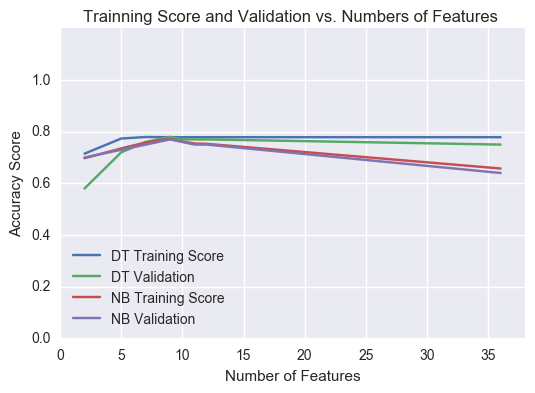

In [49]:
feature = [2,5,7,9,10,11,12,36]
DT_train_score = [0.7149,0.7735,0.7794,0.7786,0.7786,0.7786,0.7786,0.7786]
DT_Validation = [0.58,0.72,0.76,0.78,0.77,0.77,0.77,0.75]
NB_train_score = [0.6973,0.7351,0.7584,0.7719,0.7616,0.7540,0.7529,0.6574]
NB_Validation = [0.7,0.73,0.75,0.77,0.76,0.75,0.75,0.64]


plt.plot(feature,DT_train_score)
plt.plot(feature,DT_Validation)
plt.plot(feature,NB_train_score)
plt.plot(feature,NB_Validation)

plt.axis([0, 38, 0, 1.2])
plt.title("Trainning Score and Validation vs. Numbers of Features ")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score" )
plt.legend(['DT Training Score', 'DT Validation','NB Training Score','NB Validation'], loc='lower left')
plt.show()